# Bootstrap confidence bands for summary functions
### Matěj Kovář
#### NMST543 - Spatial Statistics, WS 2019/2020

## 1. Introduction

The main issue of the discussed paper is the method of estimation of confidence bands for summary functions of point processes - pair correlation function, K-function etc.

The paper is mostly interested in estimation of variance of __pair correlation function__. It is probably due to the further application of studying of astronomical data which are clustered - and pair correlation function indicates the tendencies of aggregations or regularities due to distance.

The estimation of pair correlation function itself can be obtained by kernel estimator \begin{align} \hat g(r) = \frac{1}{\hat \lambda^2} \sum_{X,Y \in \Phi \cap W}^{\neq} \frac{k_b(r - ||X-Y||)}{\sigma_dr^{d-1}|W|}\cdot e_{W,r}(X,Y), \end{align} where $k_b$ is a chosen kernel function with bandwith $b$, $\hat\lambda$ is estimated intensity of a process (in case of inhomogeneous process $\hat\lambda^2$ is replaced by $\hat\lambda(X)\hat\lambda(Y)$ which is then inside the sum), $\sigma_d$is a surface of $d$-dimensional unit sphere and $e_{W,r}$ is the edge correction factor.

The second option is to approximate the derivative of estimated $K$-function.

Estimating the variance of such estimators is a nontrivial task. One of the approches is the method suggested in Loh (2008). The principle of the Loh's estimation is based on __nonparametric bootstrap__.

## 2. Suggested solution

Loh's method of estimation is based on so-called __marked bootstrap__. It is based on assigning marks to the points of the dataset (point pattern $\Phi_D$ in observation window $W$). For given $r$ and for each point $x\in \Phi_D$ it assigns a mark $m(x)$ which contains the information of the number of points occuring in distance approximately equal to $r$. The marks are then treated as a random sample and the classical bootstrap is used on them.

Suppose we obtained a point pattern $\Phi_D$ in the observing window $W$. We simulate a homogeneous Poisson point process denoted by $\Phi_R$ on observation window $W$ with the estimated intesity $\lambda_D$ of the process $\Phi_D$ (meaning that $\Phi_R$ has no atoms outside the window $W$). Define the functions $DD(r)$, $DR(r)$ and $RR(r)$ by: 
\begin{align}
DD(r) &= \sum_{x,y \in\Phi_D}^{\neq} \mathbf 1_{[||x-y|| \in (r-b,r+b)]}, \\
DR(r) &= \sum_{x \in \Phi_D}\sum_{y \in\Phi_R} \mathbf 1_{[||x-y|| \in (r-b,r+b)]}, \\
RR(r) &= \sum_{x,y \in\Phi_R}^{\neq} \mathbf 1_{[||x-y|| \in (r-b,r+b)]},
\end{align}
and their normed versions $dd(r)$, $dr(r)$ and $rr(r)$ as:
\begin{align}
dd(r) &= \frac{DD(r)}{\Phi_D(W)^2}, \\
dr(r) &= \frac{DR(r)}{\Phi_D(W)\cdot\Phi_R(W)}, \\
rr(r) &= \frac{RR(r)}{\Phi_R(W)^2}.
\end{align}


Based on these functional quantities the further estimates are derived. The paper is mentioning a few of possible estimates, the one which they use is the Hamilton's estimate of pair correlation function given by: \begin{align} 
\hat g_H(r) = \frac{dd(r)\cdot rr(r)}{rr(r)^2}.
\end{align}

This estimator is specifically designed for use in cosmology and it suppose to improve the estimates of correlations in larger distances. The thorough justification and methodology can be found in Hamilton (1993).

For each point $x \in \Phi_D$ assign two marks by following definitions: 
\begin{align}
m_{x,1} &= \sum_{y\in\Phi_D \setminus \{x\}} \mathbf 1_{[||x-y|| \in (r-b,r+b)]}, \\
m_{x,2} &= \sum_{y\in\Phi_R} \mathbf 1_{[||x-y|| \in (r-b,r+b)]}, 
\end{align}

i.e. to each point of the point $\Phi_D$ and for given $r$ we assign the marks with information about number of points of the given process that are in distance of (approximately) $r$. First mark corresponds to points of data pattern $\Phi_D$, the second mark corresponds to points of the Poisson process $\Phi_R$.

When the marks $\{(m_{x,1}, m_{x,2}: x \in \Phi_D)\}$ are computed for a given $r$ the standard bootstrap technique is executed on them, i.e. the marks are resampled with replacement $B$ times - this corresponds to sample from emprical distribution function from the data - and for each time $b\in B$ the statistic of interest (for our purposes $\hat g_H^{b}(r)$) is computed. We therefore get the random sample $\{\hat g_H^{b}(r)\}_{b\in\{1,\dots, B\}}$ which we can order from lowest value to highest - we obtain the ordered random sample $\{\hat g^{(b)}_H(r)\}$. The confidence interval is then obtained as $$[2\hat g_H(r) - \hat g_H^{(B+1)(1-\alpha/2)}(r), 2\hat g_H(r) - \hat g_H^{(B+1)(\alpha/2)}(r)].$$

In contrast to previous spatial bootstrap attempts (e.g. resampling points and then computing the number of neighbours) the structure of point process is preserved by resampling the beforehand-computed numbers of neighbours.

## 3. Implementation in R

Firstly we apply the methods on Poisson point process. Then, since the method is intended for use in clustered point patterns analysis, we apply the method on a typical cluster point process - the Thomas point process. This is a special case of Neymann-Scott Poisson point process derived from homogeneous Poisson point process with intensity $\lambda_p$ (parent process) and density of $d$-dimensional normal distribution $N_d(0,\sigma^2 I)$ denoted as $p$. In this practical case we use the planar point process, i.e. $d=2$.

The simulations were performed on homogeneous Poisson point process with intensity $\lambda = 5000$ and on 4 differently parametrized Thomas point processes. For each of the models 100 simulations were obtained.

For every realization of point process the marks were bootstrapped 100 times. The results are presented bellow.

When creating the confidence interval, we run the function lohboot with both options of parameter global, i.e. with `global = TRUE` and `global = FALSE`. In terms of hypothesis testing the first option corresponds to global envelope tests standardly used in estimating the summary functions of point processes. The second option corresponds to to pointwise envelope tests.

We begin by loading the library `spatstat`.

In [1]:
#install.packages('spatstat')
library(spatstat)

Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.61-0       (nickname: 'Puppy zoomies') 
For an introduction to spatstat, type 'beginner' 


Note: spatstat version 1.61-0 is out of date by more than 5 months; we recommend upgrading to the latest version.


We set up the parameters for further simulations of Thomas point process.

In [2]:
# Setting the parameters of the Thomas p.p. and Poisson p.p.
KP1 = 100
KP2 = 200
SGM1 = 0.007
SGM2 = 0.02
MU1 = 25
MU2 = 50
pLambda = 5000

And we prepare the theoretical pair correlation function of Thomas point processes for all models considered.

In [3]:
# Setting the theoretical Thomas pair correlation functions
thom1Pcf = function(x){
  return(1+(1 / (4*pi*KP2*(SGM2)^2)) * (exp(-x^2 / (4*(SGM2)^2)) ))
}

thom2Pcf = function(x){
  return(1+(1 / (4*pi*KP1*(SGM2)^2)) * (exp(-x^2 / (4*(SGM2)^2)) ))
}

thom3Pcf = function(x){
  return(1+(1 / (4*pi*KP2*(SGM1)^2)) * (exp(-x^2 / (4*(SGM1)^2)) ))
}

thom4Pcf = function(x){
  return(1+(1 / (4*pi*KP1*(SGM1)^2)) * (exp(-x^2 / (4*(SGM1)^2)) ))
}

We step further to the process of simulating the point processes and marked bootstrap estimates of confidence intervals (CI) of pair correlation funcions. As mentioned above the number of simulated processes were 100 for each model as well as for the bootstrap samples for each realization of point process. This number (for both cases) might rather be higher, but due to reasonable computational feasibility we choose to make the computation with these numbers.

In [4]:
# Realizations of processes

set.seed(8128)

kolikProcesu = 100
kolikLohu = 100


pos = rpoispp(lambda = pLambda, nsim = kolikProcesu)
thom1 = rThomas(kappa = KP2, mu = MU1, scale = SGM2, nsim = kolikProcesu)
thom2 = rThomas(kappa = KP1, mu = MU2, scale = SGM2, nsim = kolikProcesu)
thom3 = rThomas(kappa = KP2, mu = MU1, scale = SGM1, nsim = kolikProcesu)
thom4 = rThomas(kappa = KP1, mu = MU2, scale = SGM1, nsim = kolikProcesu)

# Declaring variables for storage of local lohboot outputs
posLohLoc = list(1:kolikProcesu)
thom1LohLoc = list(1:kolikProcesu)
thom2LohLoc = list(1:kolikProcesu)
thom3LohLoc = list(1:kolikProcesu)
thom4LohLoc = list(1:kolikProcesu)

# Declaring variables for storage of global lohboot outputs
posLohGlob = list(1:kolikProcesu)
thom1LohGlob = list(1:kolikProcesu)
thom2LohGlob = list(1:kolikProcesu)
thom3LohGlob = list(1:kolikProcesu)
thom4LohGlob = list(1:kolikProcesu)


# Loh's marked bootstrap
set.seed(8128)
for (k in 1:kolikProcesu){
  posLohLoc[[k]] = lohboot(pos[[k]],fun = 'pcf', nsim = kolikLohu)
  posLohGlob[[k]] = lohboot(pos[[k]],fun = 'pcf', nsim = kolikLohu, global = TRUE)
  thom1LohLoc[[k]] = lohboot(thom1[[k]],fun = 'pcf', nsim = kolikLohu)
  thom1LohGlob[[k]] = lohboot(thom1[[k]],fun = 'pcf', nsim = kolikLohu, global = TRUE)
  thom2LohLoc[[k]] = lohboot(thom2[[k]],fun = 'pcf', nsim = kolikLohu)
  thom2LohGlob[[k]] = lohboot(thom2[[k]],fun = 'pcf', nsim = kolikLohu, global = TRUE)
  thom3LohLoc[[k]] = lohboot(thom3[[k]],fun = 'pcf', nsim = kolikLohu)
  thom3LohGlob[[k]] = lohboot(thom3[[k]],fun = 'pcf', nsim = kolikLohu, global = TRUE)
  thom4LohLoc[[k]] = lohboot(thom4[[k]],fun = 'pcf', nsim = kolikLohu)
  thom4LohGlob[[k]] = lohboot(thom4[[k]],fun = 'pcf', nsim = kolikLohu, global = TRUE)
  print(k) # for checking the status and speed of for cycle
}

Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 1


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 2


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 3


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 4


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 5


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 6


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 7


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 8


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 9


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 10


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 11


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 12


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 13


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 14


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 15


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 16


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 17


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 18


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 19


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 20


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 21


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 22


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 23


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 24


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 25


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 26


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 27


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 28


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 29


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 30


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 31


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 32


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 33


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 34


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 35


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 36


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 37


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 38


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 39


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 40


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 41


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 42


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 43


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 44


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 45


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 46


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 47


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 48


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 49


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 50


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 51


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 52


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 53


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 54


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 55


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 56


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 57


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 58


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 59


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 60


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 61


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 62


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 63


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 64


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 65


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 66


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 67


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 68


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 69


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 70


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 71


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 72


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 73


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 74


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 75


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 76


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 77


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 78


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 79


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 80


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 81


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 82


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 83


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 84


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 85


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 86


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 87


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 88


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 89


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 90


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 91


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 92


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 93


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 94


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 95


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 96


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 97


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 98


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 99


Warning message in lohboot(pos[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom1[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom2[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom3[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"Warning message in lohboot(thom4[[k]], fun = "pcf", nsim = kolikLohu):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

[1] 100


For each model and the type of CI estimate (global and pointwise) we compute the percentage of CI containg the true theoretical value of pair correlation function (for $r$ which the algorithm computes by default).

In [81]:
# Computing percantage of CI, which contain the theoretical value of simulated process
posPercInLoc = rep(0,kolikProcesu)
posPercInGlob = rep(0,kolikProcesu)
thom1PercInLoc = rep(0,kolikProcesu)
thom1PercInGlob = rep(0,kolikProcesu)
thom2PercInLoc = rep(0,kolikProcesu)
thom2PercInGlob = rep(0,kolikProcesu)
thom3PercInLoc = rep(0,kolikProcesu)
thom3PercInGlob = rep(0,kolikProcesu)
thom4PercInLoc = rep(0,kolikProcesu)
thom4PercInGlob = rep(0,kolikProcesu)

erka = thom1LohGlob[[1]]$r
thom1Erka = c(thom1Pcf(erka))
thom2Erka = c(thom2Pcf(erka))
thom3Erka = c(thom3Pcf(erka))
thom4Erka = c(thom4Pcf(erka))


for (k in 1:kolikProcesu){
    posPercInGlob[k] = 1 - sum(posLohGlob[[k]]$lo > 1 | posLohGlob[[k]]$hi < 1) / length(posLohGlob[[k]]$r)
    posPercInLoc[k] = 1 - sum(posLohLoc[[k]]$lo > 1 | posLohLoc[[k]]$hi < 1) / length(posLohLoc[[k]]$r)
    thom1PercInGlob[k] = 1 - sum(thom1LohGlob[[k]]$lo > thom1Erka | thom1LohGlob[[k]]$hi < thom1Erka) / length(thom1LohGlob[[k]]$r)
    thom1PercInLoc[k] = 1 - sum(thom1LohLoc[[k]]$lo > thom1Erka | thom1LohLoc[[k]]$hi < thom1Erka) / length(thom1LohLoc[[k]]$r)
    thom2PercInGlob[k] = 1 - sum(thom2LohGlob[[k]]$lo > thom2Erka | thom2LohGlob[[k]]$hi < thom2Erka) / length(thom2LohGlob[[k]]$r)
    thom2PercInLoc[k] = 1 - sum(thom2LohLoc[[k]]$lo > thom2Erka | thom2LohLoc[[k]]$hi < thom2Erka) / length(thom2LohLoc[[k]]$r)
    thom3PercInGlob[k] = 1 - sum(thom3LohGlob[[k]]$lo > thom3Erka | thom3LohGlob[[k]]$hi < thom3Erka) / length(thom3LohGlob[[k]]$r)
    thom3PercInLoc[k] = 1 - sum(thom3LohLoc[[k]]$lo > thom3Erka | thom3LohLoc[[k]]$hi < thom3Erka) / length(thom3LohLoc[[k]]$r)
    thom4PercInGlob[k] = 1 - sum(thom4LohGlob[[k]]$lo > thom4Erka | thom4LohGlob[[k]]$hi < thom4Erka) / length(thom4LohGlob[[k]]$r)
    thom4PercInLoc[k] = 1 - sum(thom4LohLoc[[k]]$lo > thom4Erka | thom4LohLoc[[k]]$hi < thom4Erka) / length(thom4LohLoc[[k]]$r)
}



In [82]:
percPerProcess = cbind(posPercInGlob,
posPercInLoc,
thom1PercInGlob,
thom1PercInLoc,
thom2PercInGlob,
thom2PercInLoc,
thom3PercInGlob,
thom3PercInLoc,
thom4PercInGlob,
thom4PercInLoc)
colnames(percPerProcess) = c('PPP Global', 'PPP Pointwise', 'Thomas I Global', 
                             'Thomas I Pointwise', 'Thomas II Global', 'Thomas II Pointwise','Thomas III Global', 
                             'Thomas III Pointwise', 'Thomas IV Global', 'Thomas IV Pointwise')
rownames(percPerProcess) = c(1:100)

In [83]:
write.csv(percPerProcess, 'percPerProcess.csv')

In [3]:
# vysl = read.csv('vysl.csv', sep = ",", header = TRUE)

Bellow we can see that global estimates contain much larger percentage than pointwise estimates (which makes sense since they are constructed much wider). We can also see that the pointwise estimates don't cover much of the pair correlation funciton for neither of the model.

In [84]:
head(percPerProcess)

PPP Global,PPP Pointwise,Thomas I Global,Thomas I Pointwise,Thomas II Global,Thomas II Pointwise,Thomas III Global,Thomas III Pointwise,Thomas IV Global,Thomas IV Pointwise
0.9941406,0.7128906,0.7792969,0.16015625,0.9804688,0.34179688,0.9492188,0.1074219,0.9921875,0.1835938
0.9902344,0.6562500,0.9882812,0.32421875,0.8437500,0.09570312,0.9453125,0.2363281,0.9218750,0.2324219
0.9941406,0.7148438,0.9921875,0.08984375,0.9941406,0.17187500,0.9570312,0.1894531,0.9492188,0.1796875
0.9921875,0.6601562,0.9863281,0.10742188,0.8750000,0.25195312,0.9589844,0.2304688,0.9394531,0.1933594
0.9941406,0.6406250,0.9941406,0.45312500,0.7031250,0.03515625,0.9375000,0.1484375,0.9511719,0.0703125
0.9941406,0.7011719,0.9921875,0.34960938,0.9941406,0.18164062,0.9921875,0.0781250,0.8925781,0.1660156


In [85]:
colMeans(percPerProcess)

PPP Global        PPP Pointwise      Thomas I Global 
           0.9939453            0.6737500            0.9709375 
  Thomas I Pointwise     Thomas II Global  Thomas II Pointwise 
           0.2192187            0.9234961            0.1757227 
   Thomas III Global Thomas III Pointwise     Thomas IV Global 
           0.9743164            0.2161719            0.9595703 
 Thomas IV Pointwise 
           0.1730859

The computations above were based on percentage of points $r$ of each function being contained in CI for this value $r$. Now we take some fixed values $r$ and compute the percentage of functions which were at that $r$ contained in CI.

We chose the values of $0.05, 0.1, 0.15$ and $0.2$ or more specifically we chose the closest numbers to these which were offered by algorithm.

In [105]:
erka[103]
erka[205]
erka[308]
erka[410]

[1] 0.04990215

[1] 0.09980431

[1] 0.1501957

[1] 0.2000978

In [136]:
posPercGlobR = rep(0,4)
posPercLocR = rep(0,4)
thom1PercGlobR = rep(0,4)
thom1PercLocR = rep(0,4)
thom2PercGlobR = rep(0,4)
thom2PercLocR = rep(0,4)
thom3PercGlobR = rep(0,4)
thom3PercLocR = rep(0,4)
thom4PercGlobR = rep(0,4)
thom4PercLocR = rep(0,4)
for (k in 1:kolikProcesu){
    if (posLohGlob[[k]]$lo[103] < 1 & posLohGlob[[k]]$hi[103] > 1){
        posPercGlobR[1] = posPercGlobR[1] + 1 / kolikProcesu    
    }
    if (posLohGlob[[k]]$lo[205] < 1 & posLohGlob[[k]]$hi[205] > 1){
        posPercGlobR[2] = posPercGlobR[2] + 1 / kolikProcesu    
    }
    if (posLohGlob[[k]]$lo[308] < 1 & posLohGlob[[k]]$hi[308] > 1){
        posPercGlobR[3] = posPercGlobR[3] + 1 / kolikProcesu    
    }
    if (posLohGlob[[k]]$lo[410] < 1 & posLohGlob[[k]]$hi[410] > 1){
        posPercGlobR[4] = posPercGlobR[4] + 1 / kolikProcesu    
    }
    if (posLohLoc[[k]]$lo[103] < 1 & posLohLoc[[k]]$hi[103] > 1){
        posPercLocR[1] = posPercLocR[1] + 1 / kolikProcesu    
    }
    if (posLohLoc[[k]]$lo[205] < 1 & posLohLoc[[k]]$hi[205] > 1){
        posPercLocR[2] = posPercLocR[2] + 1 / kolikProcesu    
    }
    if (posLohLoc[[k]]$lo[308] < 1 & posLohLoc[[k]]$hi[308] > 1){
        posPercLocR[3] = posPercLocR[3] + 1 / kolikProcesu    
    }
    if (posLohLoc[[k]]$lo[410] < 1 & posLohLoc[[k]]$hi[410] > 1){
        posPercLocR[4] = posPercLocR[4] + 1 / kolikProcesu    
    }
    
    if (thom1LohGlob[[k]]$lo[103] < thom1Erka[103] & thom1LohGlob[[k]]$hi[103] > thom1Erka[103]){
        thom1PercGlobR[1] = thom1PercGlobR[1] + 1 / kolikProcesu    
    }
    if (thom1LohGlob[[k]]$lo[205] < thom1Erka[205] & thom1LohGlob[[k]]$hi[205] > thom1Erka[205]){
        thom1PercGlobR[2] = thom1PercGlobR[2] + 1 / kolikProcesu    
    }
    if (thom1LohGlob[[k]]$lo[308] < thom1Erka[308] & thom1LohGlob[[k]]$hi[308] > thom1Erka[308]){
        thom1PercGlobR[3] = thom1PercGlobR[3] + 1 / kolikProcesu    
    }
    if (thom1LohGlob[[k]]$lo[410] < thom1Erka[410] & thom1LohGlob[[k]]$hi[410] > thom1Erka[410]){
        thom1PercGlobR[4] = thom1PercGlobR[4] + 1 / kolikProcesu    
    }
    if (thom1LohLoc[[k]]$lo[103] < thom1Erka[103] & thom1LohLoc[[k]]$hi[103] > thom1Erka[103]){
        thom1PercLocR[1] = thom1PercLocR[1] + 1 / kolikProcesu    
    }
    if (thom1LohLoc[[k]]$lo[205] < thom1Erka[205] & thom1LohLoc[[k]]$hi[205] > thom1Erka[205]){
        thom1PercLocR[2] = thom1PercLocR[2] + 1 / kolikProcesu    
    }
    if (thom1LohLoc[[k]]$lo[308] < thom1Erka[308] & thom1LohLoc[[k]]$hi[308] > thom1Erka[308]){
        thom1PercLocR[3] = thom1PercLocR[3] + 1 / kolikProcesu    
    }
    if (thom1LohLoc[[k]]$lo[410] < thom1Erka[410] & thom1LohLoc[[k]]$hi[410] > thom1Erka[410]){
        thom1PercLocR[4] = thom1PercLocR[4] + 1 / kolikProcesu    
    }
    
    
    if (thom2LohGlob[[k]]$lo[103] < thom2Erka[103] & thom2LohGlob[[k]]$hi[103] > thom2Erka[103]){
        thom2PercGlobR[1] = thom2PercGlobR[1] + 1 / kolikProcesu    
    }
    if (thom2LohGlob[[k]]$lo[205] < thom2Erka[205] & thom2LohGlob[[k]]$hi[205] > thom2Erka[205]){
        thom2PercGlobR[2] = thom2PercGlobR[2] + 1 / kolikProcesu    
    }
    if (thom2LohGlob[[k]]$lo[308] < thom2Erka[308] & thom2LohGlob[[k]]$hi[308] > thom2Erka[308]){
        thom2PercGlobR[3] = thom2PercGlobR[3] + 1 / kolikProcesu    
    }
    if (thom2LohGlob[[k]]$lo[410] < thom2Erka[410] & thom2LohGlob[[k]]$hi[410] > thom2Erka[410]){
        thom2PercGlobR[4] = thom2PercGlobR[4] + 1 / kolikProcesu    
    }
    if (thom2LohLoc[[k]]$lo[103] < thom2Erka[103] & thom2LohLoc[[k]]$hi[103] > thom2Erka[103]){
        thom2PercLocR[1] = thom2PercLocR[1] + 1 / kolikProcesu    
    }
    if (thom2LohLoc[[k]]$lo[205] < thom2Erka[205] & thom2LohLoc[[k]]$hi[205] > thom2Erka[205]){
        thom2PercLocR[2] = thom2PercLocR[2] + 1 / kolikProcesu    
    }
    if (thom2LohLoc[[k]]$lo[308] < thom2Erka[308] & thom2LohLoc[[k]]$hi[308] > thom2Erka[308]){
        thom2PercLocR[3] = thom2PercLocR[3] + 1 / kolikProcesu    
    }
    if (thom2LohLoc[[k]]$lo[410] < thom2Erka[410] & thom2LohLoc[[k]]$hi[410] > thom2Erka[410]){
        thom2PercLocR[4] = thom2PercLocR[4] + 1 / kolikProcesu    
    }
    
    
    if (thom3LohGlob[[k]]$lo[103] < thom3Erka[103] & thom3LohGlob[[k]]$hi[103] > thom3Erka[103]){
        thom3PercGlobR[1] = thom3PercGlobR[1] + 1 / kolikProcesu    
    }
    if (thom3LohGlob[[k]]$lo[205] < thom3Erka[205] & thom3LohGlob[[k]]$hi[205] > thom3Erka[205]){
        thom3PercGlobR[2] = thom3PercGlobR[2] + 1 / kolikProcesu    
    }
    if (thom3LohGlob[[k]]$lo[308] < thom3Erka[308] & thom3LohGlob[[k]]$hi[308] > thom3Erka[308]){
        thom3PercGlobR[3] = thom3PercGlobR[3] + 1 / kolikProcesu    
    }
    if (thom3LohGlob[[k]]$lo[410] < thom3Erka[410] & thom3LohGlob[[k]]$hi[410] > thom3Erka[410]){
        thom3PercGlobR[4] = thom3PercGlobR[4] + 1 / kolikProcesu    
    }
    if (thom3LohLoc[[k]]$lo[103] < thom3Erka[103] & thom3LohLoc[[k]]$hi[103] > thom3Erka[103]){
        thom3PercLocR[1] = thom3PercLocR[1] + 1 / kolikProcesu    
    }
    if (thom3LohLoc[[k]]$lo[205] < thom3Erka[205] & thom3LohLoc[[k]]$hi[205] > thom3Erka[205]){
        thom3PercLocR[2] = thom3PercLocR[2] + 1 / kolikProcesu    
    }
    if (thom3LohLoc[[k]]$lo[308] < thom3Erka[308] & thom3LohLoc[[k]]$hi[308] > thom3Erka[308]){
        thom3PercLocR[3] = thom3PercLocR[3] + 1 / kolikProcesu    
    }
    if (thom3LohLoc[[k]]$lo[410] < thom3Erka[410] & thom3LohLoc[[k]]$hi[410] > thom3Erka[410]){
        thom3PercLocR[4] = thom3PercLocR[4] + 1 / kolikProcesu    
    }
    
    
    if (thom4LohGlob[[k]]$lo[103] < thom4Erka[103] & thom4LohGlob[[k]]$hi[103] > thom4Erka[103]){
        thom4PercGlobR[1] = thom4PercGlobR[1] + 1 / kolikProcesu    
    }
    if (thom4LohGlob[[k]]$lo[205] < thom4Erka[205] & thom4LohGlob[[k]]$hi[205] > thom4Erka[205]){
        thom4PercGlobR[2] = thom4PercGlobR[2] + 1 / kolikProcesu    
    }
    if (thom4LohGlob[[k]]$lo[308] < thom4Erka[308] & thom4LohGlob[[k]]$hi[308] > thom4Erka[308]){
        thom4PercGlobR[3] = thom4PercGlobR[3] + 1 / kolikProcesu    
    }
    if (thom4LohGlob[[k]]$lo[410] < thom4Erka[410] & thom4LohGlob[[k]]$hi[410] > thom4Erka[410]){
        thom4PercGlobR[4] = thom4PercGlobR[4] + 1 / kolikProcesu    
    }
    if (thom4LohLoc[[k]]$lo[103] < thom4Erka[103] & thom4LohLoc[[k]]$hi[103] > thom4Erka[103]){
        thom4PercLocR[1] = thom4PercLocR[1] + 1 / kolikProcesu    
    }
    if (thom4LohLoc[[k]]$lo[205] < thom4Erka[205] & thom4LohLoc[[k]]$hi[205] > thom4Erka[205]){
        thom4PercLocR[2] = thom4PercLocR[2] + 1 / kolikProcesu    
    }
    if (thom4LohLoc[[k]]$lo[308] < thom4Erka[308] & thom4LohLoc[[k]]$hi[308] > thom4Erka[308]){
        thom4PercLocR[3] = thom4PercLocR[3] + 1 / kolikProcesu    
    }
    if (thom4LohLoc[[k]]$lo[410] < thom4Erka[410] & thom4LohLoc[[k]]$hi[410] > thom4Erka[410]){
        thom4PercLocR[4] = thom4PercLocR[4] + 1 / kolikProcesu    
    }
}
percR = cbind(posPercGlobR,
posPercLocR,
thom1PercGlobR,
thom1PercLocR,
thom2PercGlobR,
thom2PercLocR,
thom3PercGlobR,
thom3PercLocR,
thom4PercGlobR,
thom4PercLocR)

colnames(percR) = c('PPP Global', 'PPP Pointwise', 'Thomas I Global', 
                             'Thomas I Pointwise', 'Thomas II Global', 'Thomas II Pointwise','Thomas III Global', 
                             'Thomas III Pointwise', 'Thomas IV Global', 'Thomas IV Pointwise')

rownames(percR) = c('0.05', '0.1', '0.15', '0.2')

The percentage for given $r$ is given bellow.

In [137]:
percR

,PPP Global,PPP Pointwise,Thomas I Global,Thomas I Pointwise,Thomas II Global,Thomas II Pointwise,Thomas III Global,Thomas III Pointwise,Thomas IV Global,Thomas IV Pointwise
0.05,1,0.77,0.99,0.34,0.95,0.23,1,0.21,1,0.21
0.1,1,0.61,0.99,0.25,0.97,0.16,1,0.20,1,0.21
0.15,1,0.58,1.00,0.18,0.98,0.19,1,0.24,1,0.20
0.2,1,0.56,1.00,0.17,0.98,0.12,1,0.16,1,0.15


Construction of CI for one realization of each model and each type (global and pointwise) considered above can be seen in following subsections.

## 3.1 Homogeneous Poisson point process

We firstly tested the method on homogeneous Poisson point process with intensity $\lambda = 5000$ on a window $W = [0,1]^2$. This corresponds to (on average) 5000 points randomly and independently placed inside a unit window. One of the realization of such process can be seen bellow.

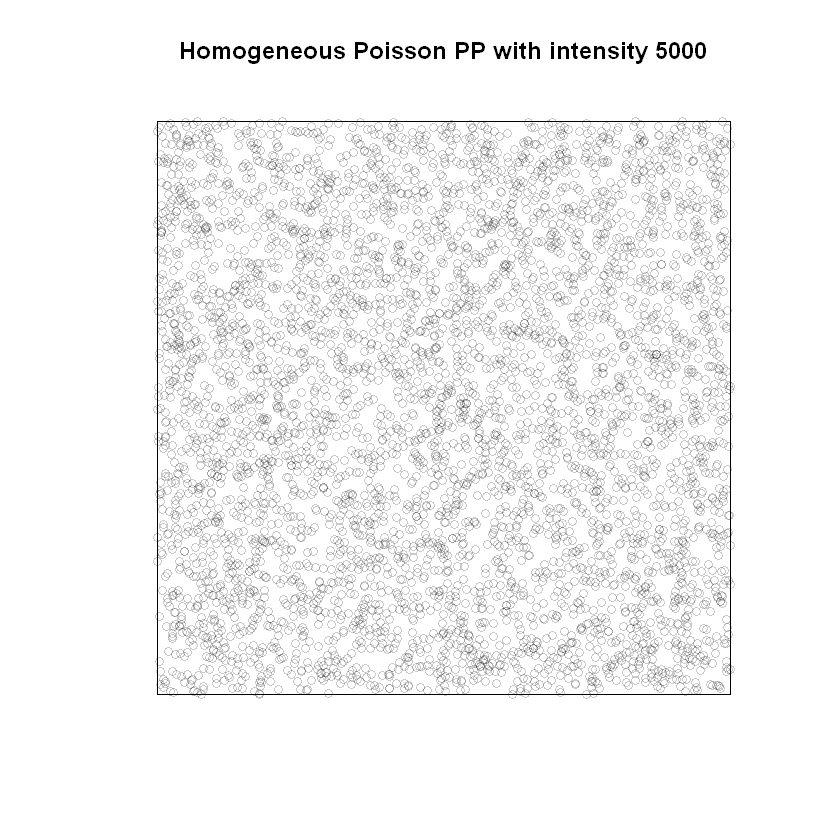

In [48]:
set.seed(8128)
pos = rpoispp(lambda = 5000)
plot(pos, pch = 1, "Homogeneous Poisson PP with intensity 5000")

We runned the function `lohboot` with both options of parameter `global`, i.e. with `global = TRUE` and `global = FALSE`. One of the constructed confidence interval for both cases can be seen bellow. The red dashed line corresponds to theoretical pair correlation function which is constant $(g(r) = 1)$.

In [49]:
set.seed(8128)
lohPoissGlob = lohboot(pos, fun = 'pcf', global = TRUE, nsim = 100)

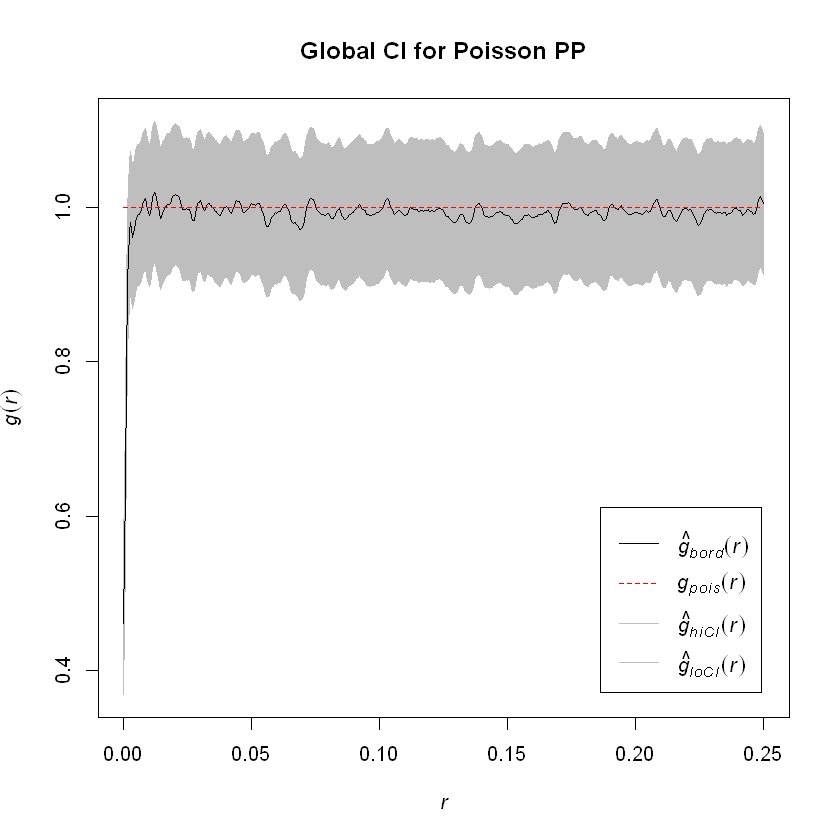

In [50]:
plot(lohPoissGlob, main = "Global CI for Poisson PP")

In [53]:
set.seed(8128)
lohPoissLoc = lohboot(pos, fun = 'pcf', global = FALSE, nsim = 100)

Warning message in lohboot(pos, fun = "pcf", global = FALSE, nsim = 100):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

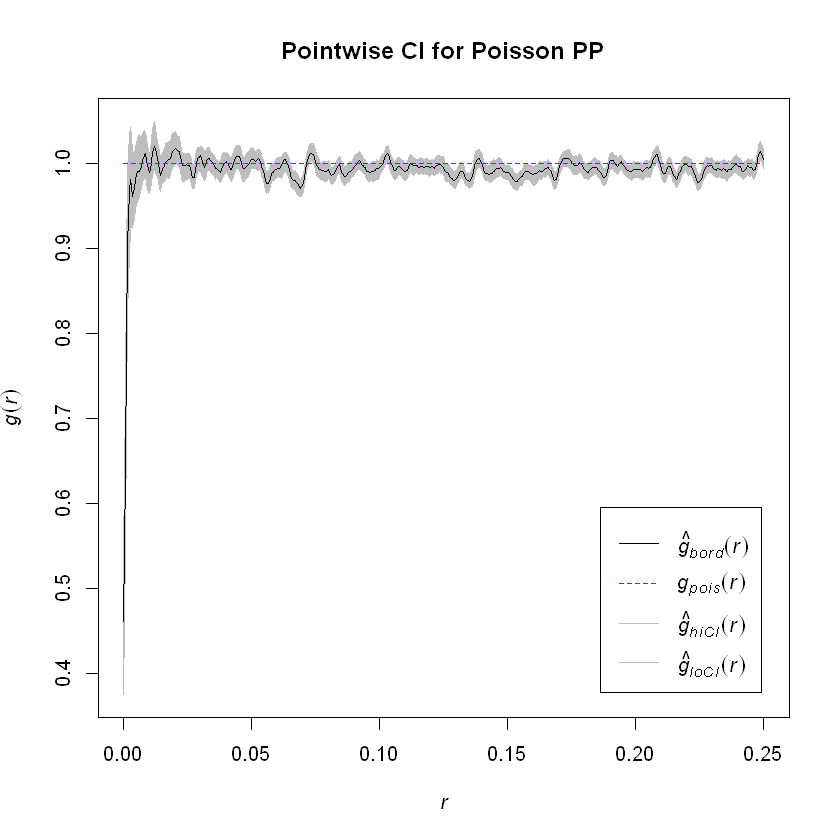

In [54]:
plot(lohPoissLoc, main = "Pointwise CI for Poisson PP")

## 3.2 Thomas Process with parameters $(\lambda_P, \mu, \sigma) = (200, 25, 0.02)$

Second model for which we tested the mark bootstrap method was Thomas process with parameters $(\lambda_P, \mu, \sigma) = (200, 25, 0.02)$ on $W = [0,1]^2$. One of the realization can be seen bellow.

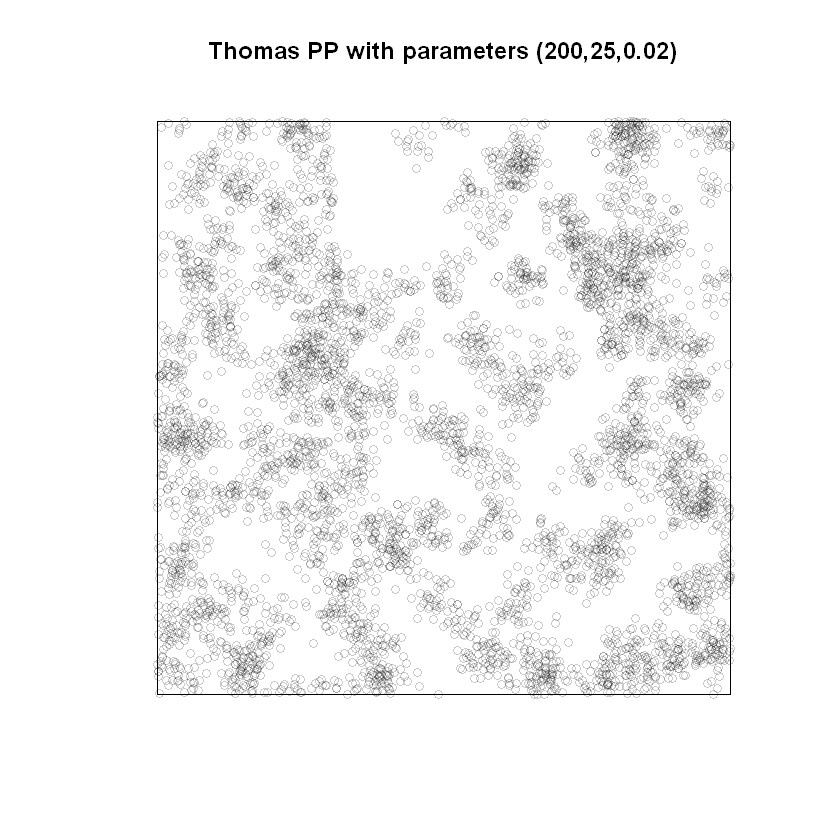

In [55]:
set.seed(8128)
Thom1 = rThomas(kappa = KP2, scale = SGM2, mu = MU1)
plot(Thom1, pch = 1, main = "Thomas PP with parameters (200,25,0.02)")

Again we can see the constructed CI for one realization bellow. Again it is constructed for both global and pointwise estimations. The blue line represents the theoretical pair correlation function of Thomas PP with the parameters mentioned.

In [56]:
set.seed(8128)
lohThom1Glob = lohboot(Thom1, fun = 'pcf', nsim = 100, global = TRUE)

Warning message in plot.window(...):
""fun" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in box(...):
""fun" is not a graphical parameter"Warning message in title(...):
""fun" is not a graphical parameter"

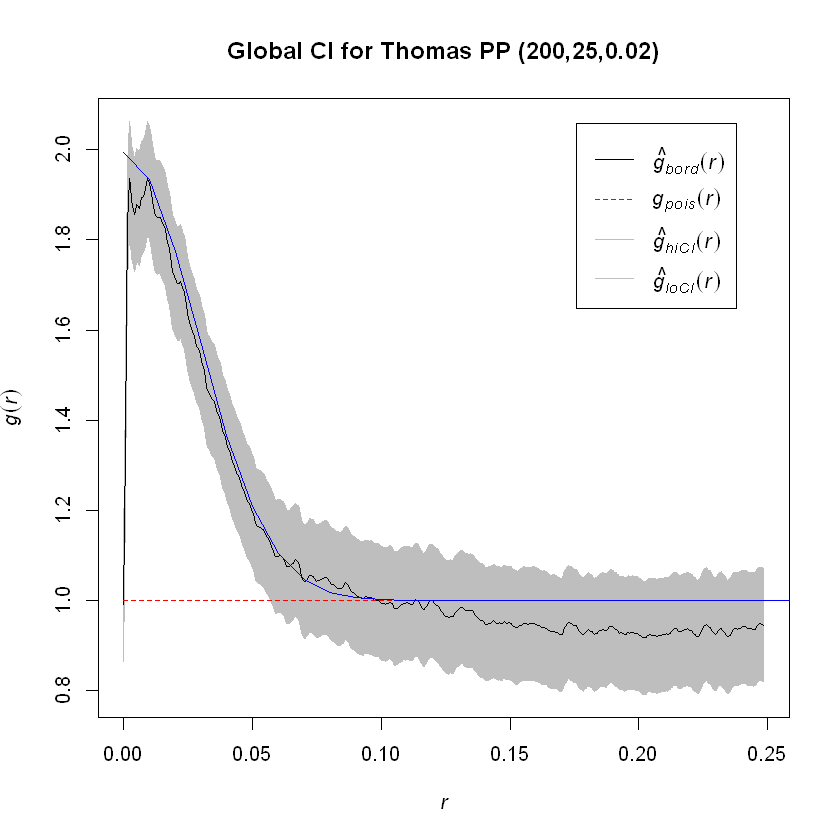

In [57]:
plot(lohThom1Glob, main = "Global CI for Thomas PP (200,25,0.02)", fun = 'pcf')
plot(thom1Pcf, col ="blue", add = TRUE)

In [58]:
set.seed(8128)
lohThom1Loc = lohboot(Thom1, fun = 'pcf', nsim = 100, global = FALSE)

Warning message in lohboot(Thom1, fun = "pcf", nsim = 100, global = FALSE):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

Warning message in plot.window(...):
""fun" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in box(...):
""fun" is not a graphical parameter"Warning message in title(...):
""fun" is not a graphical parameter"

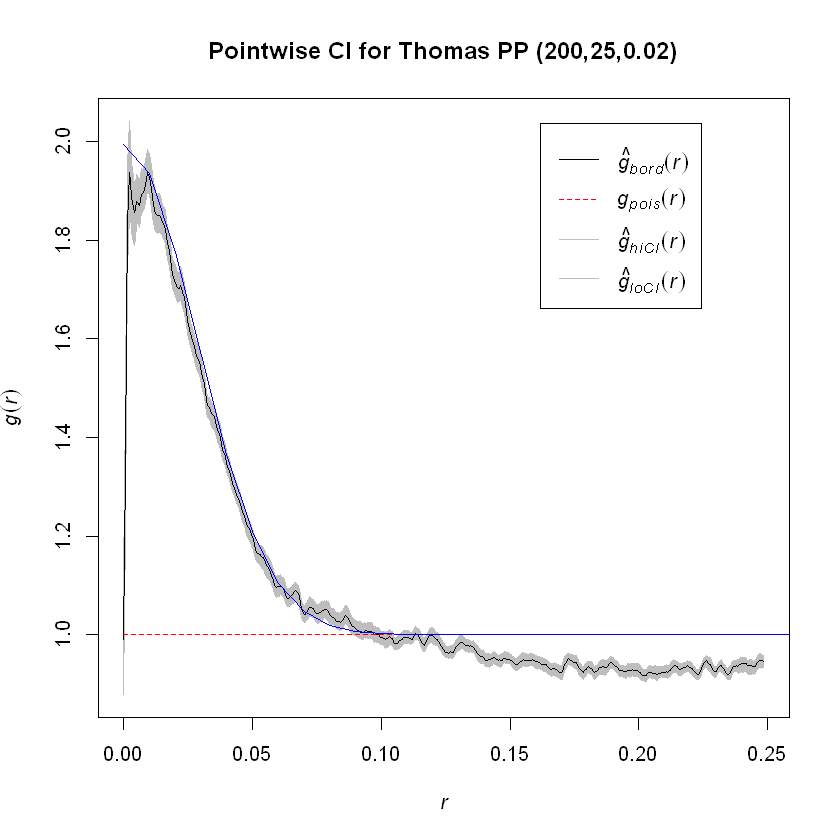

In [59]:
plot(lohThom1Loc, main = "Pointwise CI for Thomas PP (200,25,0.02)", fun = 'pcf')
plot(thom1Pcf, col ="blue", add = TRUE)

## 3.3 Thomas Process with parameters $(\lambda_P, \mu, \sigma) = (100,50, 0.02)$

We now consider a model of Thomas Process where the number of parent points is lower than before $\lambda_P = 100$, but we double the number of offsprings $\mu = 50$. We keep the variance same as in previous example. This yields into richer clusters and higher regularity than in the previous Thomas model. Again we show one of the realizations of Thomas point process with these parameters.

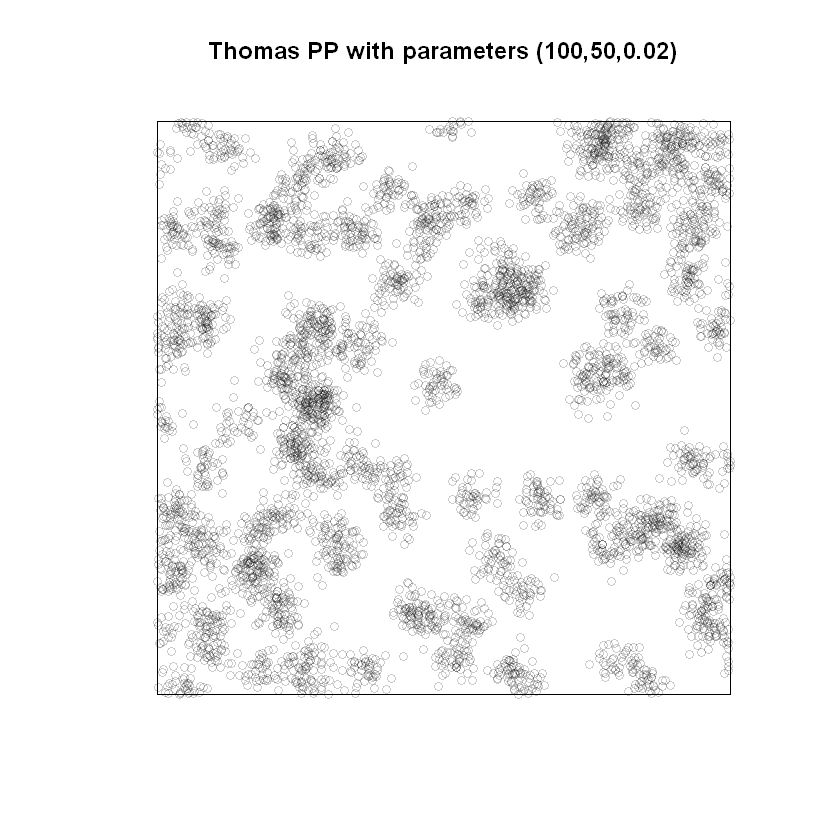

In [60]:
set.seed(8128)
Thom2 = rThomas(kappa = KP1, scale = SGM2, mu = MU2)
plot(Thom2, pch = 1, main = "Thomas PP with parameters (100,50,0.02)")

Again we can see the constructed CI for one realization bellow. Again it is constructed for both global and pointwise estimations. The blue line represents the theoretical pair correlation function of Thomas PP with the parameters mentioned.

In [61]:
set.seed(8128)
lohThom2Glob = lohboot(Thom2, fun = 'pcf', nsim = 100, global = TRUE)

Warning message in plot.window(...):
""fun" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in box(...):
""fun" is not a graphical parameter"Warning message in title(...):
""fun" is not a graphical parameter"

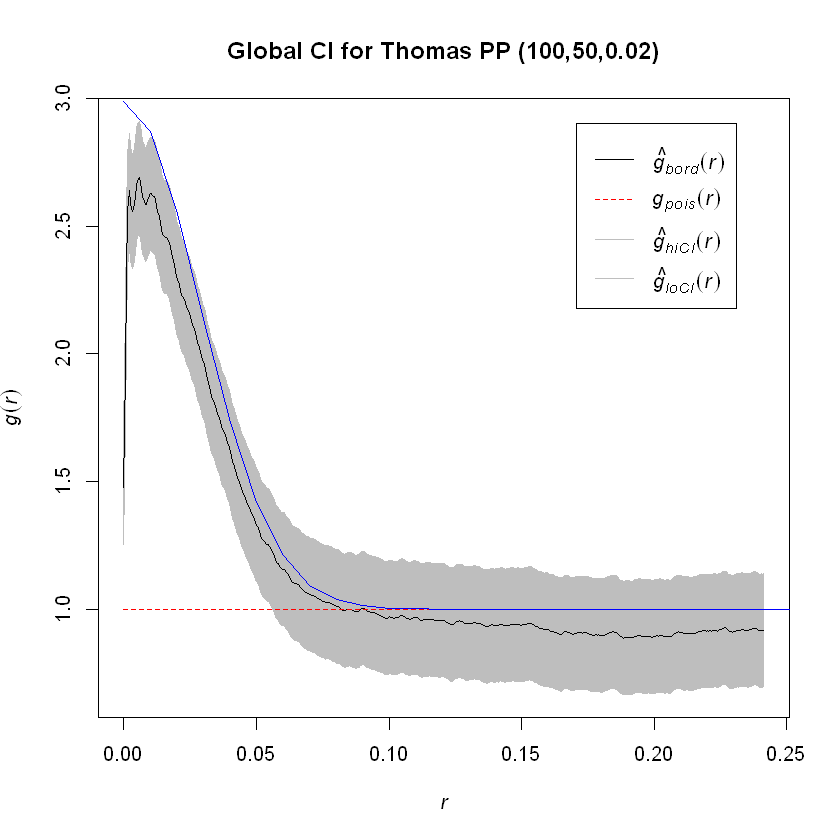

In [62]:
plot(lohThom2Glob, main = "Global CI for Thomas PP (100,50,0.02)", fun = 'pcf')
plot(thom2Pcf, col ="blue", add = TRUE)

In [63]:
set.seed(8128)
lohThom2Loc = lohboot(Thom2, fun = 'pcf', nsim = 100, global = FALSE)

Warning message in lohboot(Thom2, fun = "pcf", nsim = 100, global = FALSE):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

Warning message in plot.window(...):
""fun" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in box(...):
""fun" is not a graphical parameter"Warning message in title(...):
""fun" is not a graphical parameter"

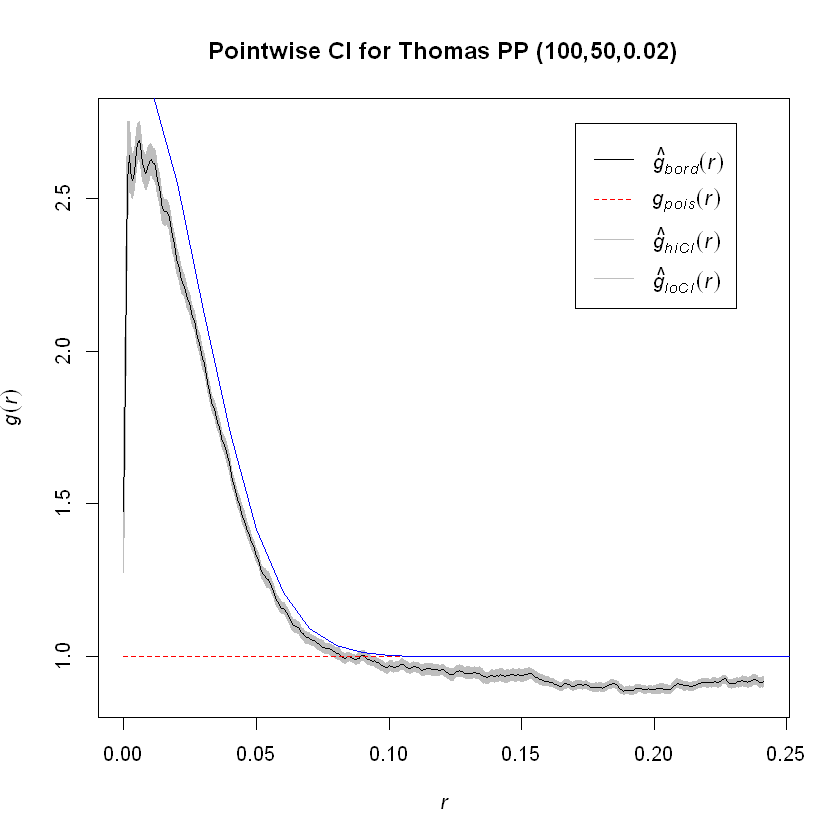

In [64]:
plot(lohThom2Loc, main = "Pointwise CI for Thomas PP (100,50,0.02)", fun = 'pcf')
plot(thom2Pcf, col ="blue", add = TRUE)

## 3.4 Thomas Process with parameters $(\lambda_P, \mu, \sigma) = (200, 25, 0.007)$

Now consider the model with the same parents and offspring rate as in the first Thomas model, but we lower the variance. This yields into very small distances between points and high pair correlation functions for small $r$. One of realizations of Thomas process with these parameters can be again seen bellow.

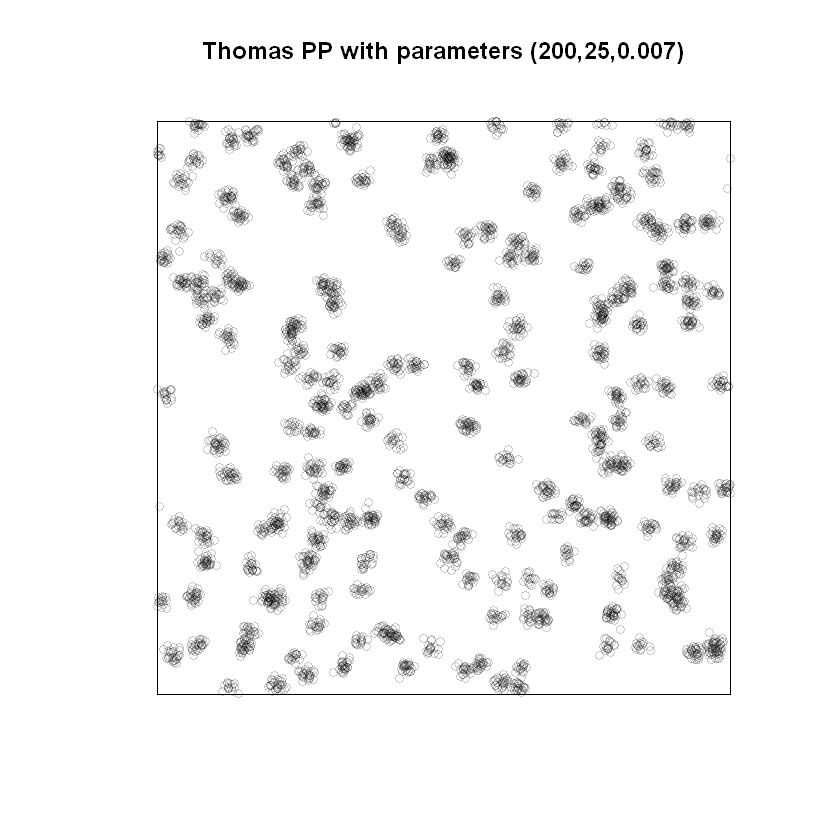

In [65]:
set.seed(8128)
Thom3 = rThomas(kappa = KP2, scale = SGM1, mu = MU1)
plot(Thom3, pch = 1, main = "Thomas PP with parameters (200,25,0.007)")

Again we can see the constructed CI for one realization bellow. Again it is constructed for both global and pointwise estimations. The blue line represents the theoretical pair correlation function of Thomas PP with the parameters mentioned.

In [66]:
set.seed(8128)
lohThom3Glob = lohboot(Thom3, fun = 'pcf', nsim = 100, global = TRUE)

Warning message in plot.window(...):
""fun" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in box(...):
""fun" is not a graphical parameter"Warning message in title(...):
""fun" is not a graphical parameter"

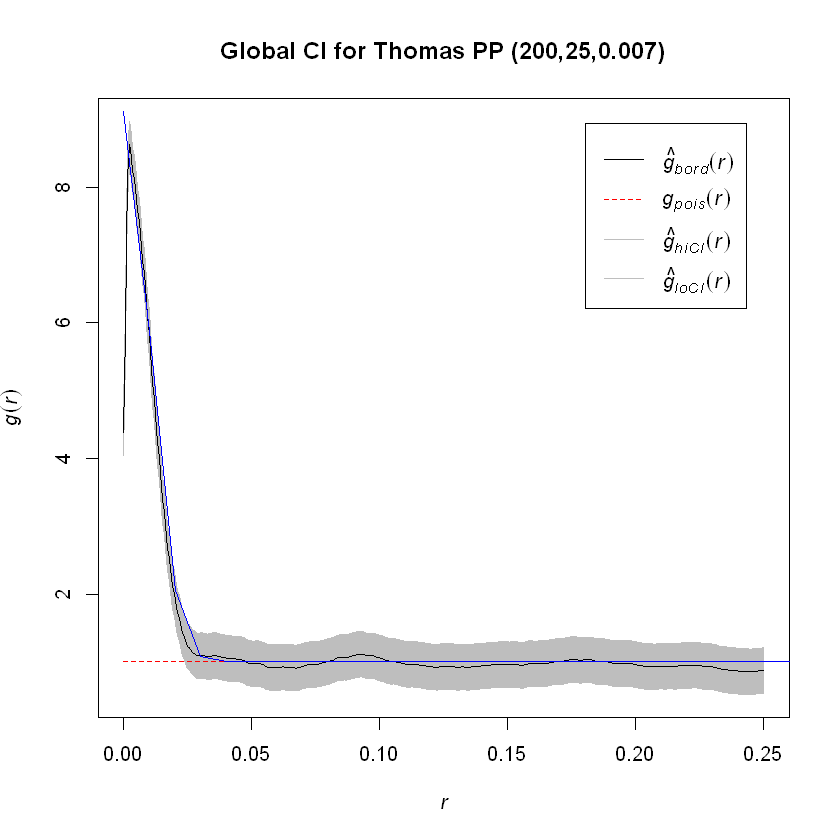

In [67]:
plot(lohThom3Glob, main = "Global CI for Thomas PP (200,25,0.007)", fun = 'pcf')
plot(thom3Pcf, col ="blue", add = TRUE)

In [68]:
set.seed(8128)
lohThom3Loc = lohboot(Thom3, fun = 'pcf', nsim = 100, global = FALSE)

Warning message in lohboot(Thom3, fun = "pcf", nsim = 100, global = FALSE):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

Warning message in plot.window(...):
""fun" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in box(...):
""fun" is not a graphical parameter"Warning message in title(...):
""fun" is not a graphical parameter"

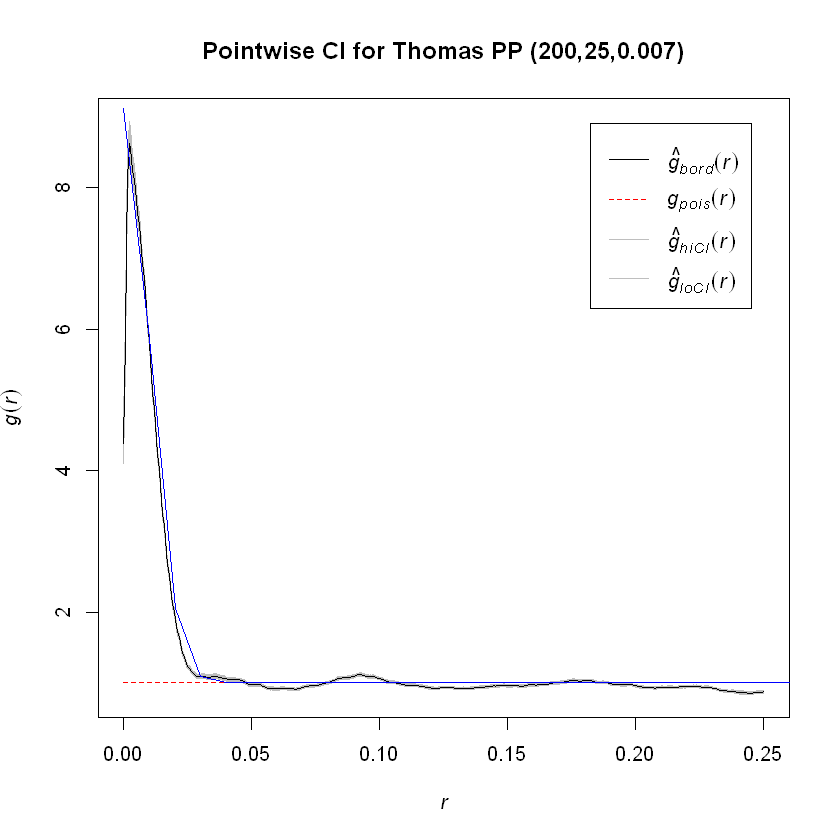

In [69]:
plot(lohThom3Loc, main = "Pointwise CI for Thomas PP (200,25,0.007)", fun = 'pcf')
plot(thom3Pcf, col ="blue", add = TRUE)

## 3.5 Thomas Process with parameters $(\lambda_P, \mu, \sigma) = (100, 50, 0.007)$

Last but not least...

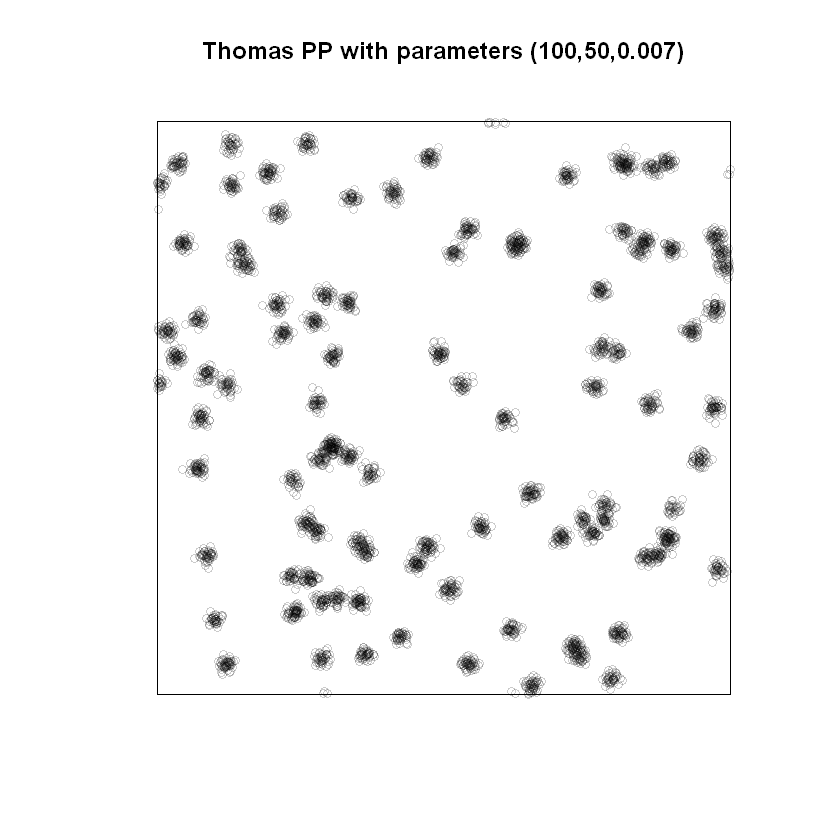

In [70]:
set.seed(8128)
Thom4 = rThomas(kappa = KP1, scale = SGM1, mu = MU2)
plot(Thom4, pch = 1, main = "Thomas PP with parameters (100,50,0.007)")

Again we can see the constructed CI for one realization bellow. Again it is constructed for both global and pointwise estimations. The blue line represents the theoretical pair correlation function of Thomas PP with the parameters mentioned.

In [71]:
set.seed(8128)
lohThom4Glob = lohboot(Thom4, fun = 'pcf', nsim = 100, global = TRUE)

Warning message in plot.window(...):
""fun" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in box(...):
""fun" is not a graphical parameter"Warning message in title(...):
""fun" is not a graphical parameter"

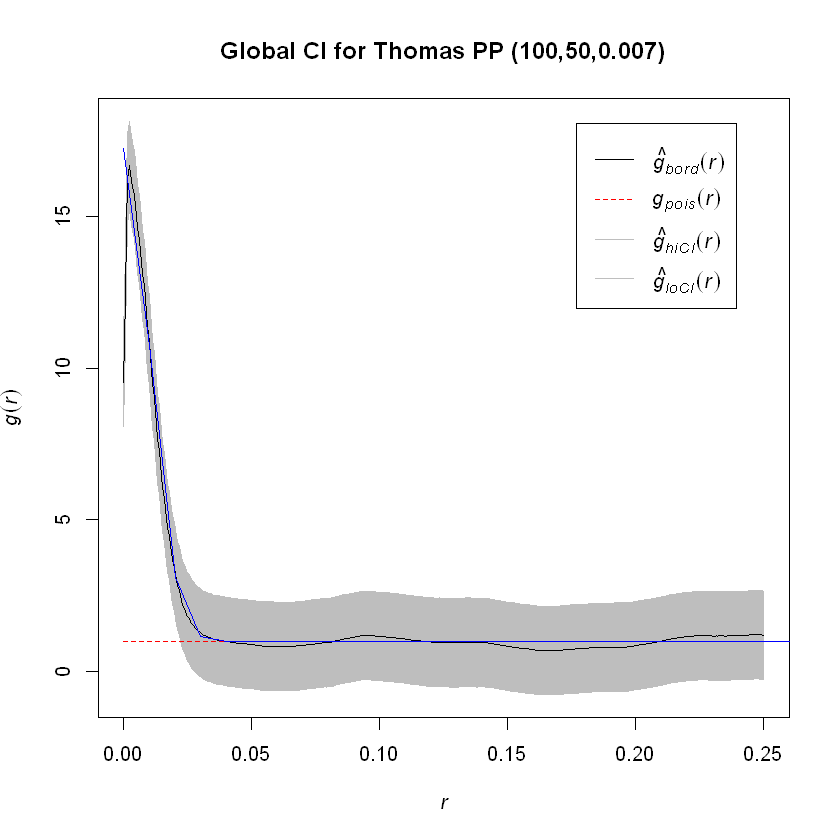

In [72]:
plot(lohThom4Glob, main = "Global CI for Thomas PP (100,50,0.007)", fun = 'pcf')
plot(thom4Pcf, col ="blue", add = TRUE)

In [73]:
set.seed(8128)
lohThom4Loc = lohboot(Thom4, fun = 'pcf', nsim = 100, global = FALSE)

Warning message in lohboot(Thom4, fun = "pcf", nsim = 100, global = FALSE):
"confidence level 0.95 corresponds to a non-integer rank (97.5) so quantiles will be interpolated"

Warning message in plot.window(...):
""fun" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""fun" is not a graphical parameter"Warning message in box(...):
""fun" is not a graphical parameter"Warning message in title(...):
""fun" is not a graphical parameter"

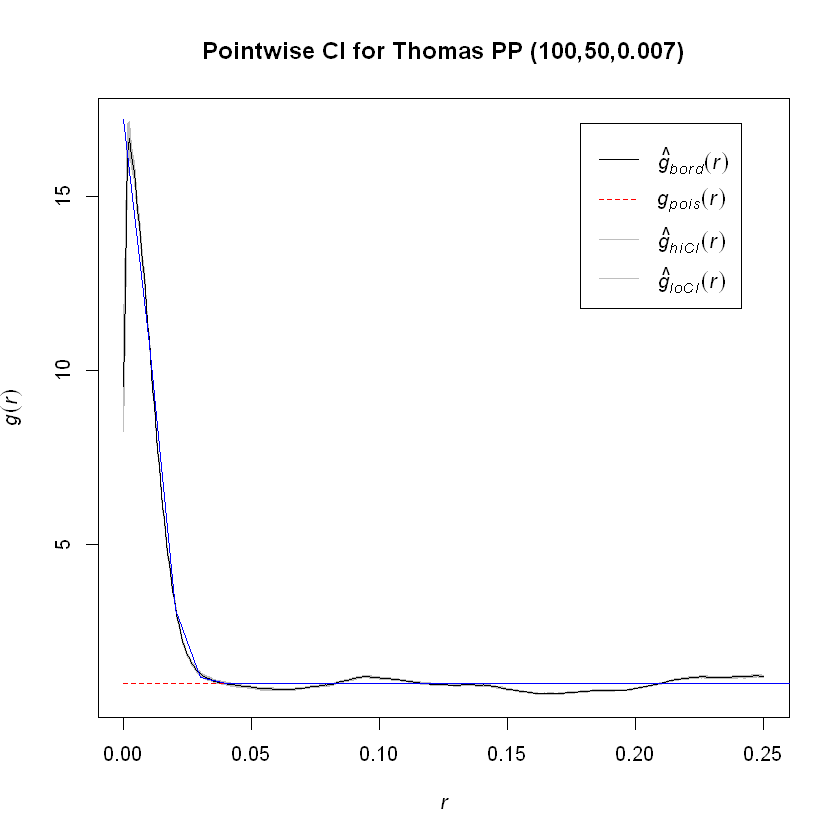

In [74]:
plot(lohThom4Loc, main = "Pointwise CI for Thomas PP (100,50,0.007)", fun = 'pcf')
plot(thom4Pcf, col ="blue", add = TRUE)

**References**:

* Loh, J.M. (2008): A Valid and Fast Spatial Bootstrap for Correlation Functions, The Astrophysical Journal, 681, 2008, pp. 726-734
* Hamilton, A.J.S. (1993): Toward Better Ways to Measure the Galaxy Correlation Function, The Astrophysical Journal, 417, 1993, pp. 19-35